# EDA on Algerian Forest Fire

Dataset Information
Additional Information

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region. 

The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.


Variable Information
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely   â€œFireâ€ and â€œnot Fireâ€

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header = 1)


In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


# Data Cleaning

df.isnull().sum()

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


this dataset is converted into two sets based on region from 122th idex we can make a column based on the the region

1. "bejaia region dataset"
2. "sidi-Bel Abbas Region dataset"

Add new Column with region

In [7]:
df.loc[:122,'Region'] =1
df.loc[122:,'Region']= 2
df[['Region']] = df[['Region']].astype(int)

In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [9]:
## remove null  or na values rows
df = df.dropna().reset_index(drop = True)

In [10]:
df.shape


(244, 15)

In [11]:
## cloumn which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


Null and other Unwanted row are removed

In [12]:
# remove 122th column
df = df.drop(122).reset_index(drop = True)

Some column names were mispaced so we can fix it

In [13]:
# list out column names to check
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Looks like the values were misspaced so we can use str.strip() method

In [14]:
df.columns = df.columns.str.strip()

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Changing the required columns as integer data types

In [16]:
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

changing other column to float

In [18]:
objects = [features for features in df.columns if df[features].dtypes =='O']
for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)
    

In [19]:
# final datatypes check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [21]:
# check uniques values of target variable
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

look like values is misspaced so we can strip

In [22]:
# strip mispaced values
df.Classes = df.Classes.str.strip()

In [23]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

# Region 1( Bejaia Region)

In [24]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


Region 2 (Sidi-Bel Abbas Region)

In [25]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [26]:
df.to_csv('algeria-forest-fire-cleanes-data.csv',index = False)

# 3.5 Eploratory Data Analysis (EDA)

In [27]:
# droping year feature
df1 = df.drop(['day','month','year'],axis  =1)

In [28]:
# encoding Notfire as 0 and fire as 1
df['Classes'] = np.where(df['Classes'] =='not fire',0,1)

In [29]:
#check count
df1.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

Visualisation of Distribution

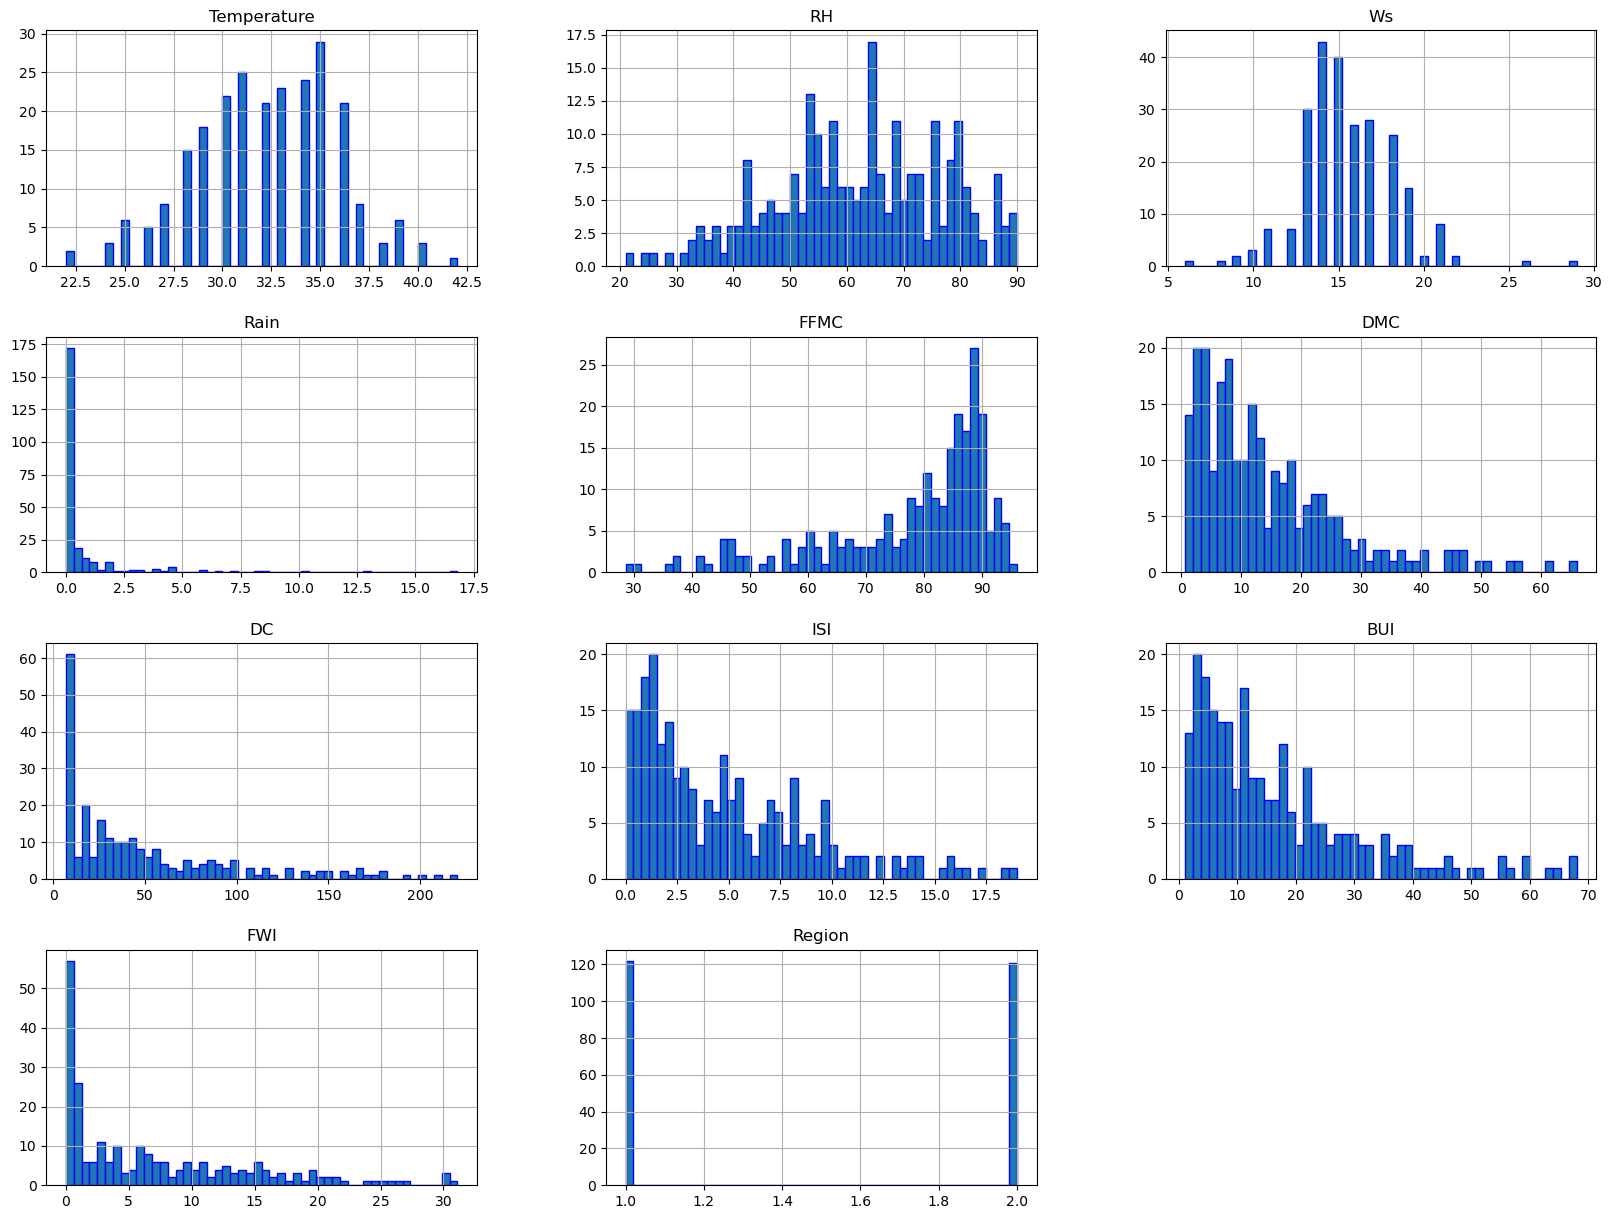

In [30]:
df1.hist(bins = 50,figsize =(20,15),ec = 'b')
plt.show()

In [31]:
# percentage of pie chart
percentage = df.Classes.value_counts(normalize = True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

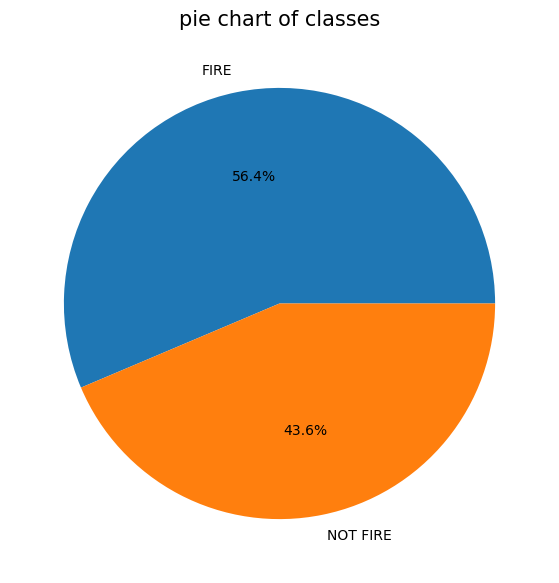

In [32]:
# plotting charts

classlabels = ["FIRE","NOT FIRE"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels = classlabels,autopct = '%1.1f%%')
plt.title("pie chart of classes",fontsize = 15)
plt.show()

In [ ]:

# Correlation Chart
# Assuming 'corr' is a DataFrame containing correlation values
k = len(df1.columns)
cols = df1.corr()['Classes'].nlargest(k).index
cm = np.corrcoef(df1[cols].values.T)

# Set the font scale
sns.set(font_scale=1)

# Create a heatmap
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show()



Canadian Forest fire Weather Index (FWI) system

this column can be considered  for regression problem

In [ ]:
#Boxplot
Bx = sns.boxplot(df['FWI'],color = 'red')

# MonthWise Fire Analysis

In [ ]:
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue = "Classes", data = df,ec = 'black',palette = 'Set2')
plt.title("Fire Analysis monthewsie for Bejaia Region",fontsize=18,weight='bold')
plt.ylabel('count',weight = 'bold')
plt.xlabel('Months',weight = 'bold')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(4),['June','July','August','September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [ ]:
dftemp = df.loc[df['Region']==2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue = "Classes", data = df,ec = 'black',palette = 'Set2')
plt.title("Fire Analysis monthewsie for Sidi-Bel Abbes Region",fontsize=18,weight='bold')
plt.ylabel('count',weight = 'bold')
plt.xlabel('Months',weight = 'bold')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(4),['June','July','August','September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

its is obeseved that august and septeber had the most number of forest fire for both region and from above plot of months we can understand .

Most of the fires happended in August and er high Fire happended in only 3 months-june,jultand august

less fires was september

# 3.5 Eplolatory Data Analysis (EDA ) on all Features 

In [ ]:
df.columns

In [57]:
def barchart(feature,xlabel):
    plt.figure(figsize=(14,8))
    by_feature = df1.groupby([feature],as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature,y='Classes',data = by_feature[[feature,"Classes"]],estimator = sum)
    ax.set(xlabel = xlabel,ylabel='Fire Count')

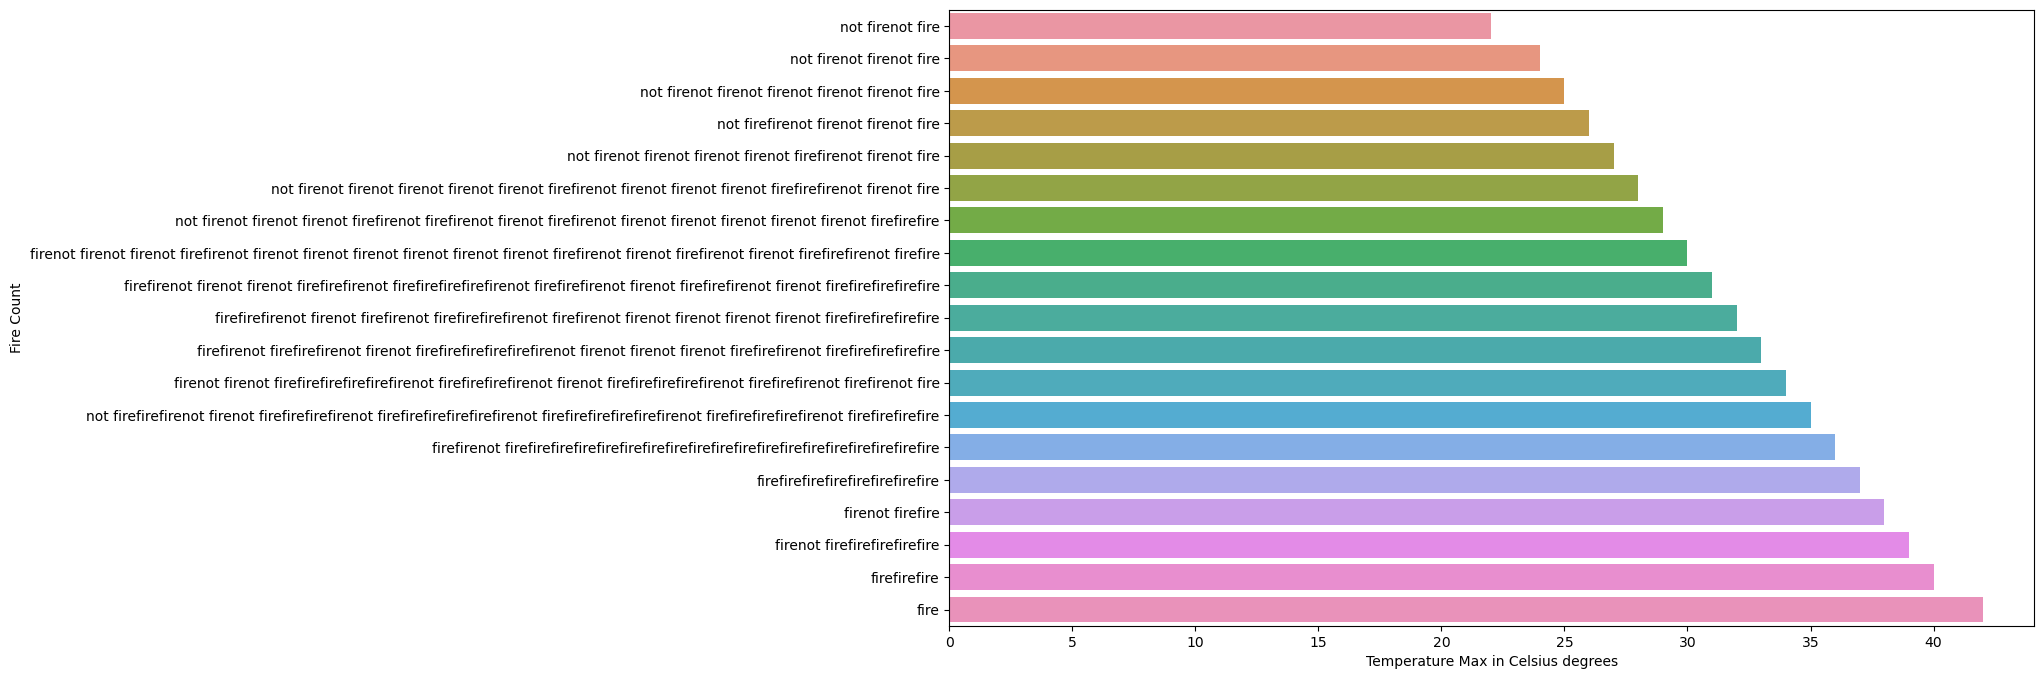

In [58]:
barchart('Temperature','Temperature Max in Celsius degrees')

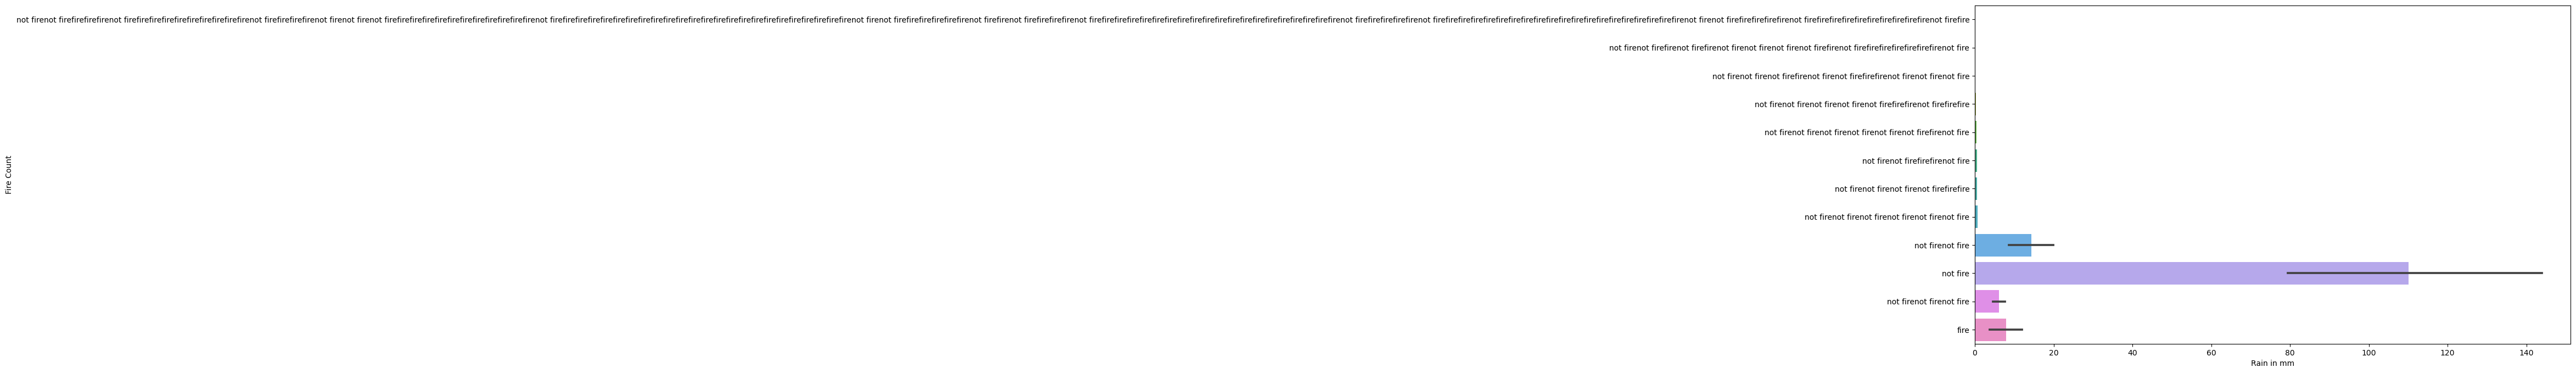

In [59]:
barchart('Rain','Rain in mm')

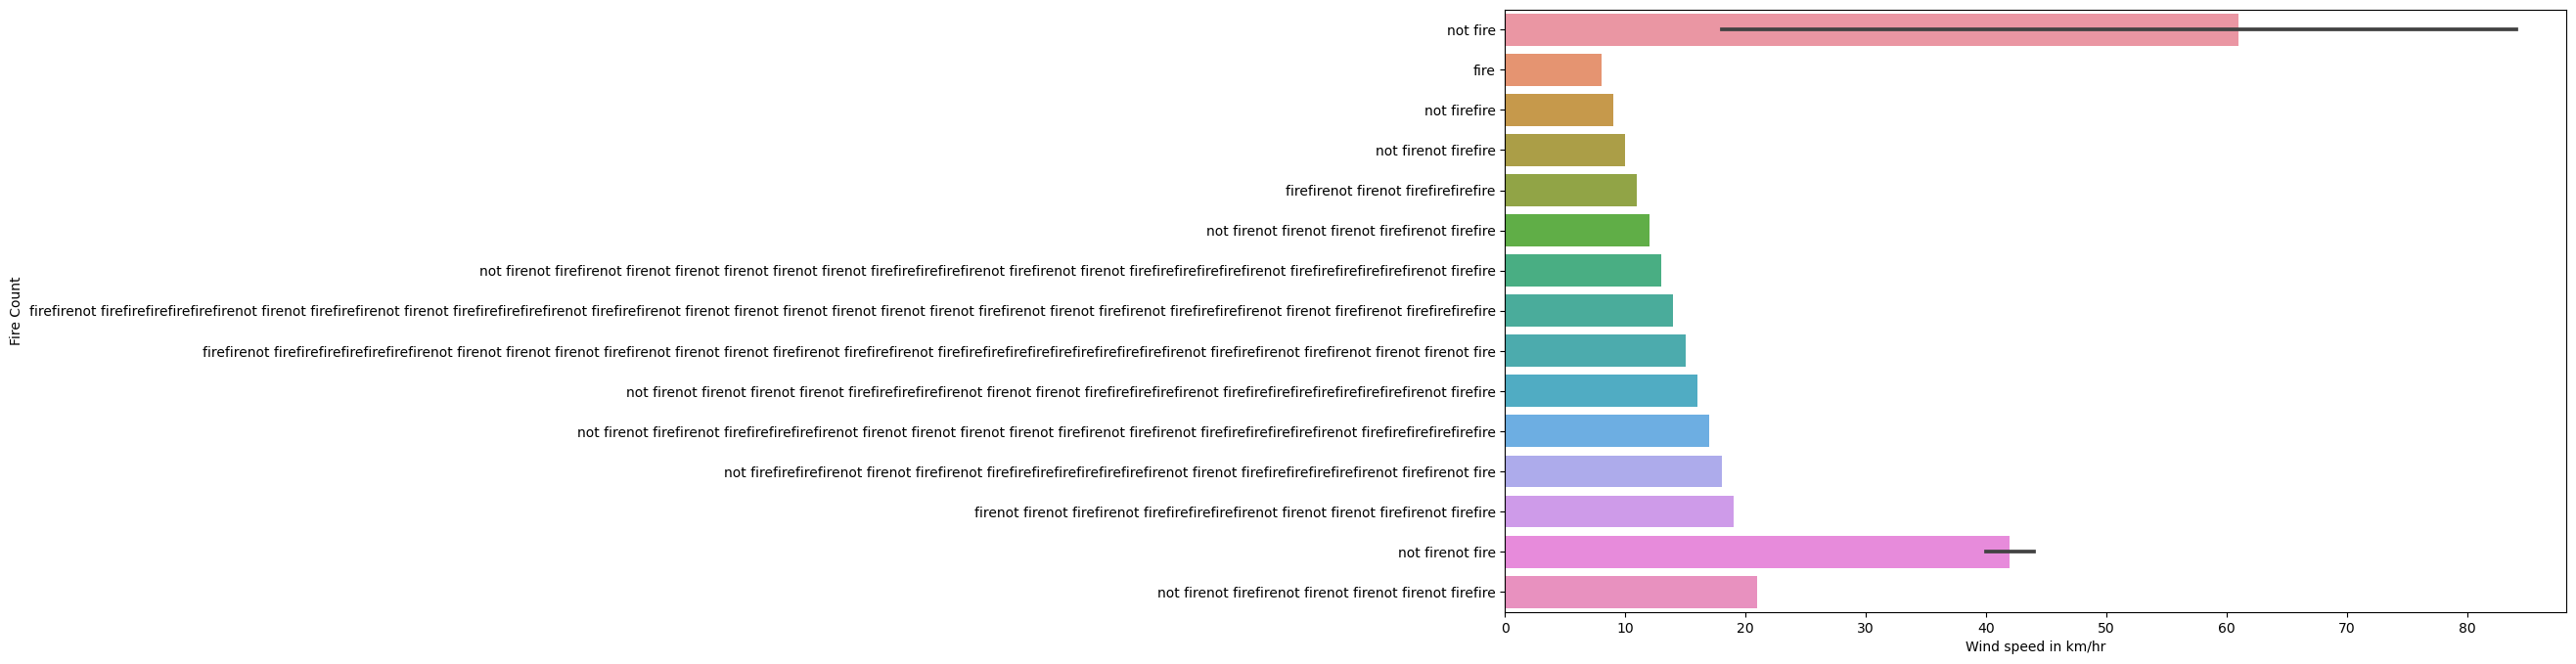

In [60]:
barchart('Ws','Wind speed in km/hr')

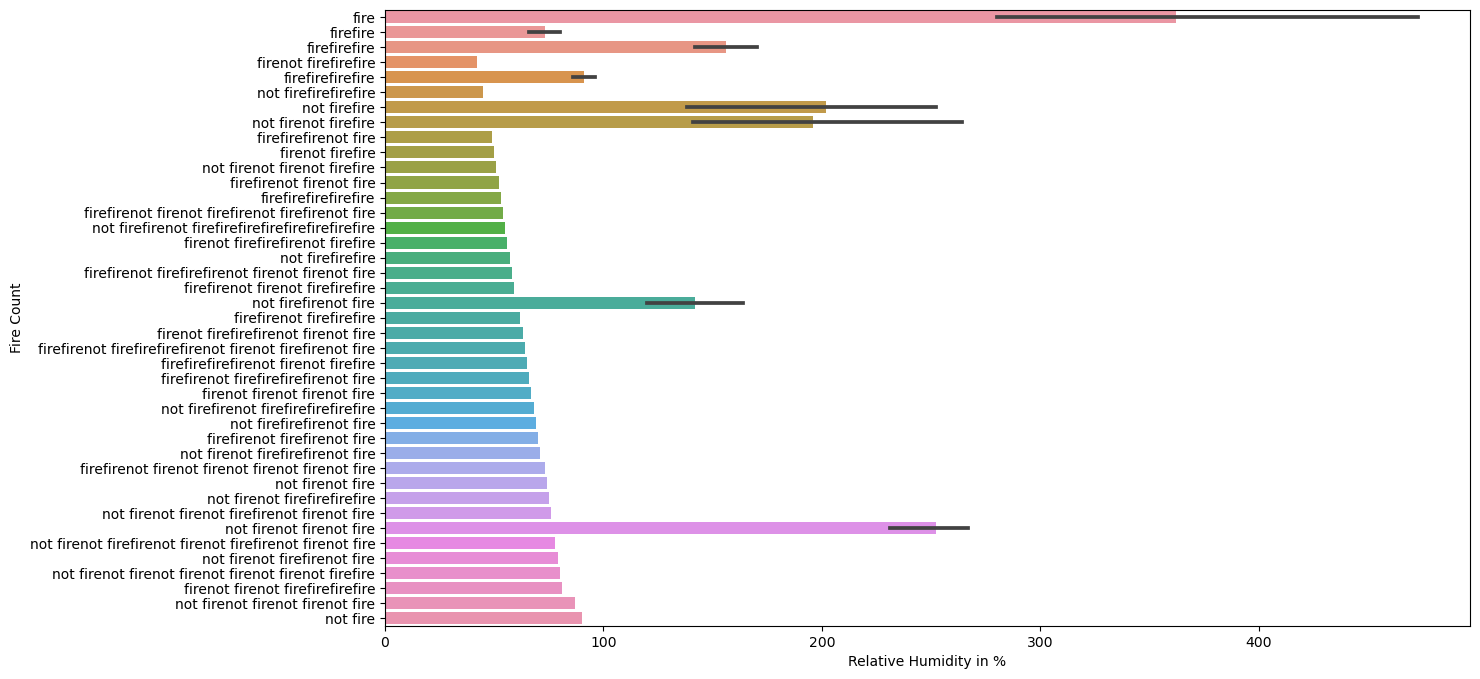

In [61]:
barchart('RH','Relative Humidity in %')

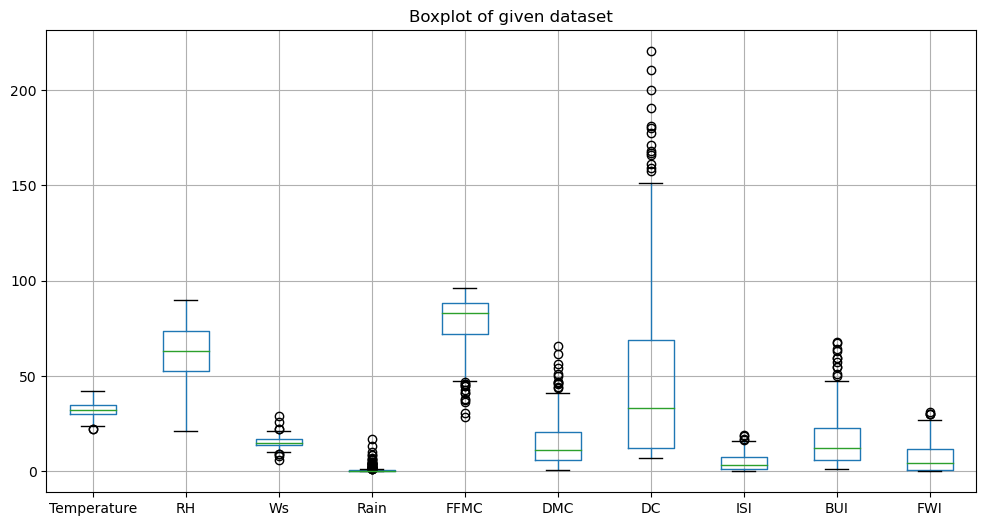

In [62]:
dftemp = df1.drop(['Classes','Region'],axis = 1)
fig = plt.figure(figsize=(12,6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of given dataset")
plt.show()

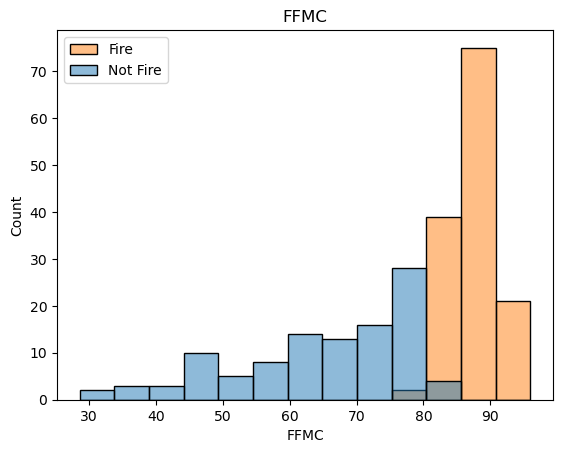

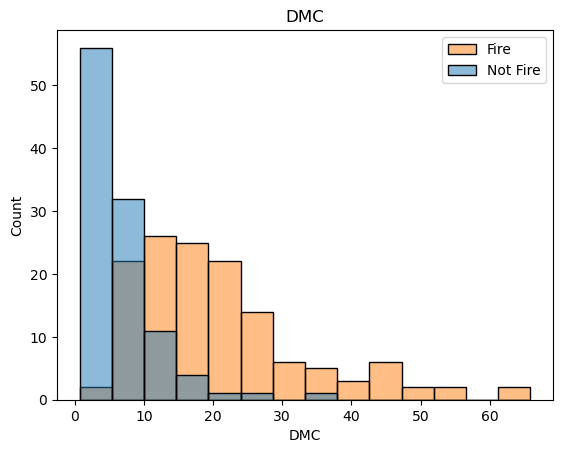

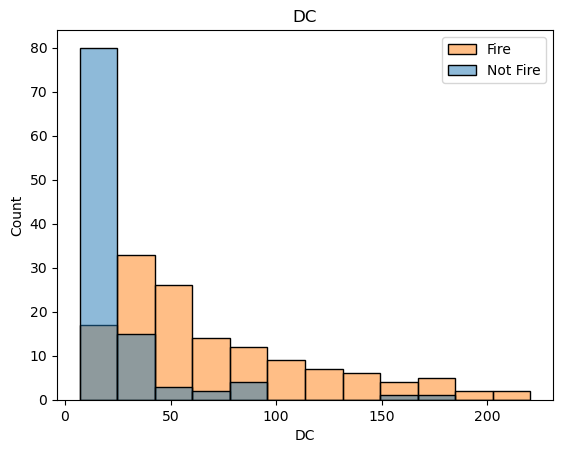

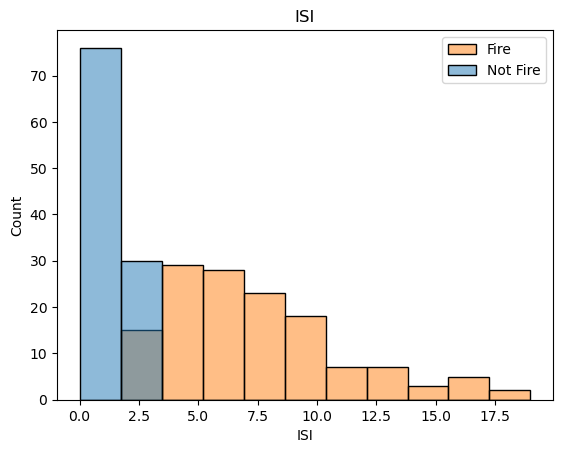

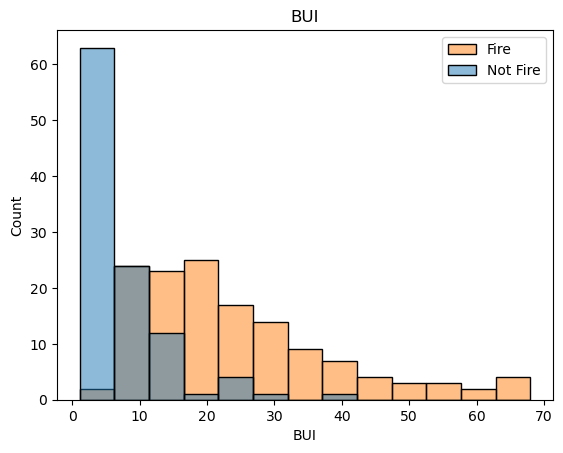

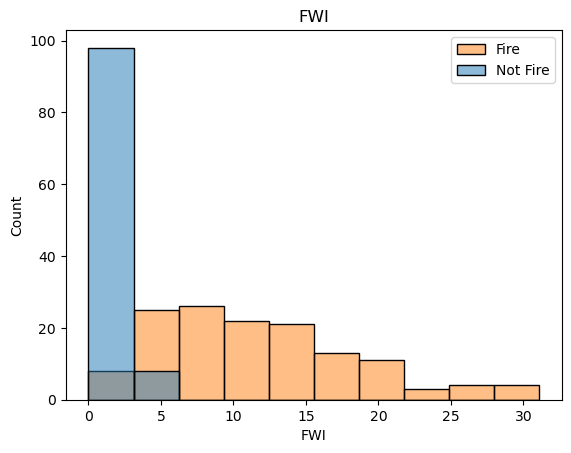

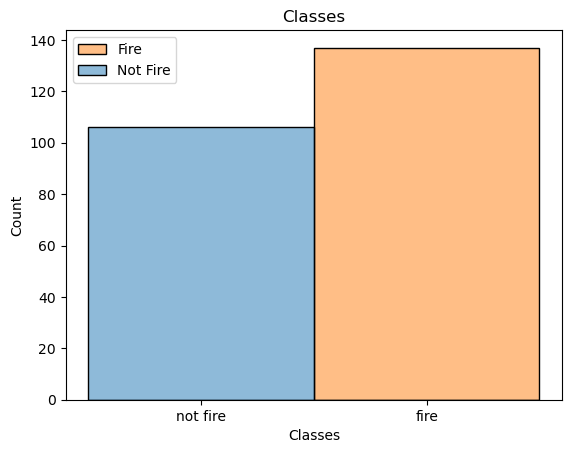

In [39]:
dftemp = dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'],axis =1)
for feature in dftemp:
    sns.histplot(data = dftemp,x = feature,hue = 'Classes')
    plt.legend(labels = ['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

In [40]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [41]:
Y = df['Classes']
X = df.drop('Classes' , axis =1)

<Axes: >

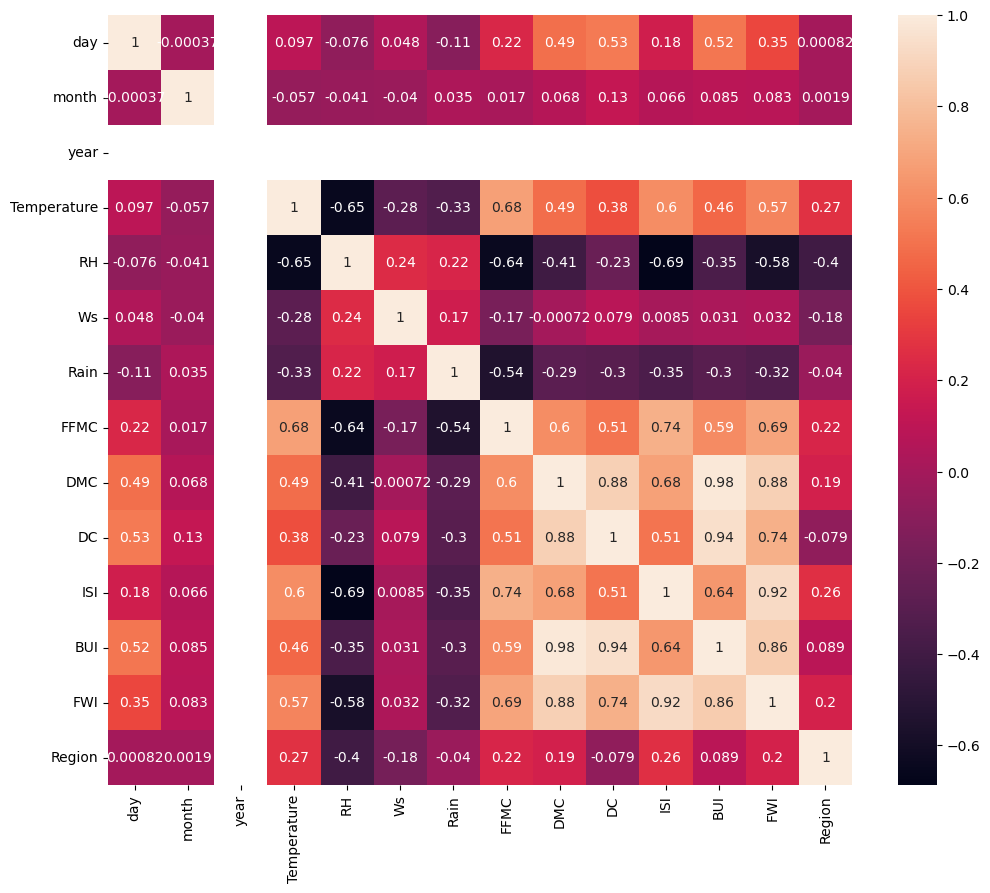

In [42]:

## CHECK FOR multicollinearity
plt.figure(figsize=(12,10))
corr = X.corr()
sns.heatmap(corr,annot = True)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.8,random_state = 42)

In [45]:
X_train.shape

(194, 14)

In [46]:
X_test.shape

(49, 14)

In [47]:
## feature selection with help of correlation
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr           

In [48]:
## threshold--Domain Expertise
corr_features = correlation(X_train,0.65)

In [49]:
corr_features

{'BUI', 'DC', 'FFMC', 'FWI', 'ISI', 'RH'}

if we need to drop column we can drop RH but it not Highly correlated So we carry on





# Feature Scaling Or Standardization

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [51]:
X_train_scaled

array([[ 0.91502056,  1.35966051,  0.        , ..., -0.76790976,
        -0.86275306, -1.01036297],
       [ 1.14086533,  0.45009451,  0.        , ...,  3.10086694,
         2.93741047,  0.98974332],
       [-1.00465998, -0.45947148,  0.        , ..., -0.24276653,
        -0.2850255 ,  0.98974332],
       ...,
       [-1.68219429,  1.35966051,  0.        , ..., -1.03380506,
        -0.93978341, -1.01036297],
       [ 1.47963249, -0.45947148,  0.        , ...,  0.14278167,
         0.44676275,  0.98974332],
       [-0.55297044,  1.35966051,  0.        , ..., -0.99392076,
        -0.91410663, -1.01036297]])

# Box PLots To Understand Effect Of Standard Scaler

C:\Users\Abdul\AppData\Local\Temp\ipykernel_5644\737242340.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after Scaling')

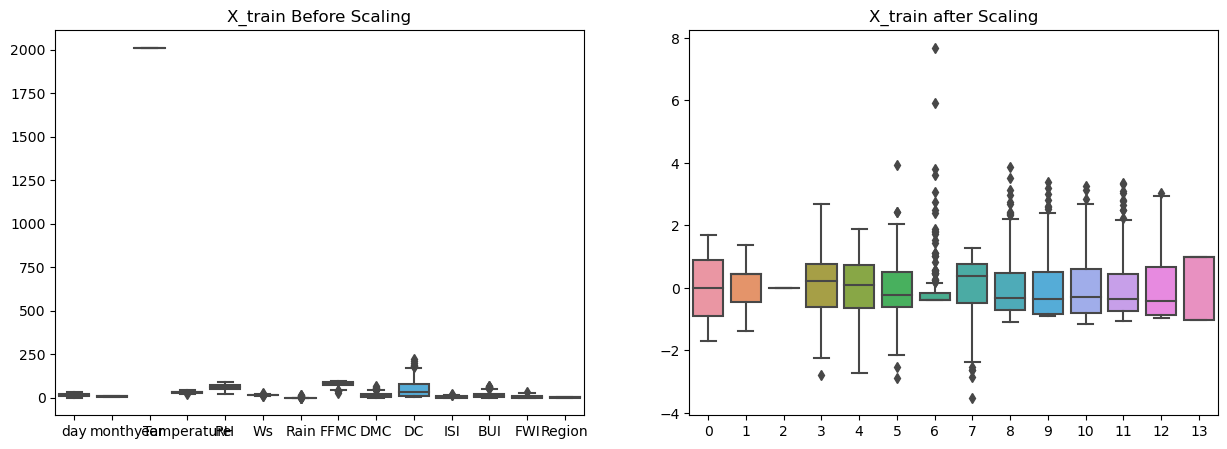

In [52]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after Scaling')


# Linear Regression Model

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
LR = LinearRegression()
LR.fit(X_train_scaled,Y_train)
y_pred = LR.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print('Mean Absolute Error',mae)
print('R2 score',score)

Mean Absolute Error 0.2262186792885963
R2 score 0.6854938016066445


# Lasso Regression

In [87]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print('Mean Absolute Error',mae)
print('R2 score',score)
 

Mean Absolute Error 0.49316221333894383
R2 score -0.0010334685645558839


# Ridge Regression

In [88]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print('Mean Absolute Error',mae)
print('R2 score',score)

Mean Absolute Error 0.49316221333894383
R2 score -0.0010334685645558839


In [89]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,1,1
1,29,61,13,1.3,64.4,4.1,1.0,0.4,1,1
2,26,82,22,13.1,47.1,2.5,0.3,0.1,1,1
3,25,89,13,2.5,28.6,1.3,0.0,0.0,1,1
4,27,77,16,0.0,64.8,3.0,1.2,0.5,1,1
